<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


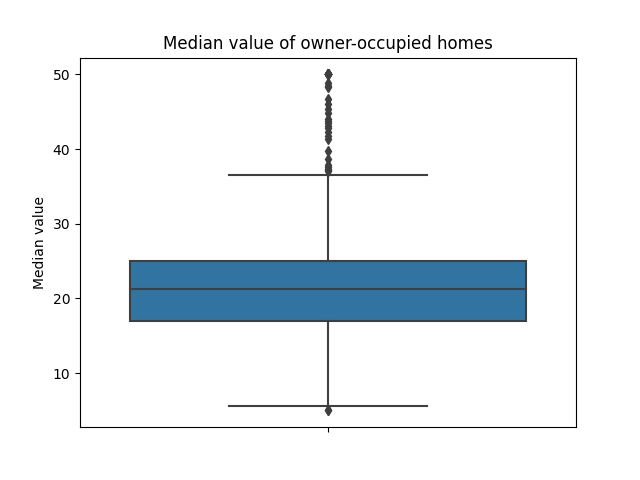

In [6]:
# Median value of owner-occupied homes
ax=sns.boxplot(data = boston_df, y="MEDV")
pyplot.title("Median value of owner-occupied homes")
pyplot.ylabel("Median value")
pyplot.show()

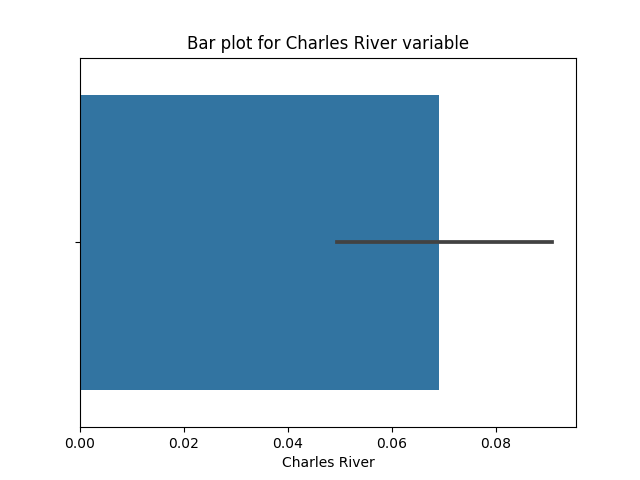

In [7]:
#Provide a  bar plot for the Charles river variable
ax=sns.barplot(x="CHAS", data=boston_df)

pyplot.title("Bar plot for Charles River variable")
pyplot.xlabel("Charles River")
pyplot.show()

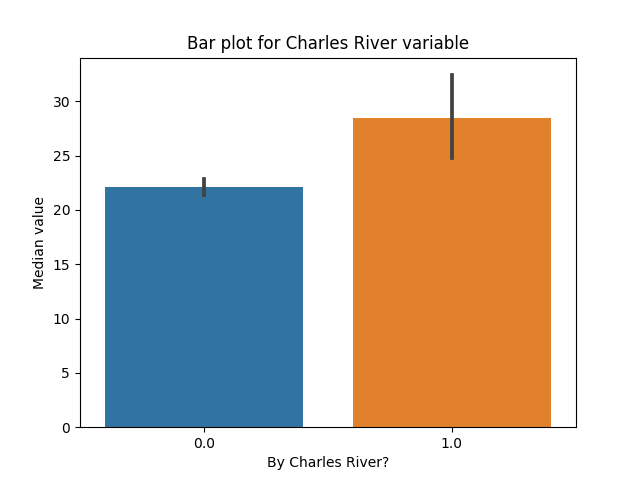

In [8]:
#Provide a  bar plot for the Charles river variable
ax=sns.barplot(x="CHAS", y="MEDV", data=boston_df)

pyplot.title("Bar plot for Charles River variable")
pyplot.xlabel("By Charles River?")
pyplot.ylabel("Median value")
pyplot.show()

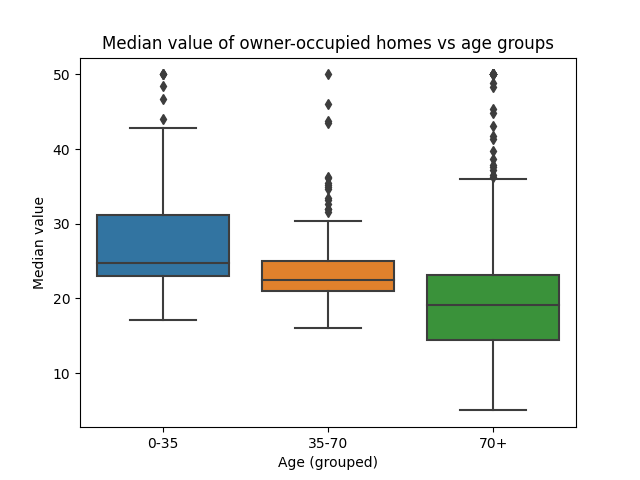

In [9]:
#  boxplot for the MEDV variable vs the AGE variable.


boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '0-35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = '35-70'
boston_df.loc[(boston_df['AGE'] >= 57), 'AGE_GROUP'] = '70+'
boston_df.sort_values(by="AGE_GROUP",axis=0,inplace=True)

ax=sns.boxplot(data = boston_df, y="MEDV", x="AGE_GROUP")
pyplot.title("Median value of owner-occupied homes vs age groups")
pyplot.xlabel("Age (grouped)")
pyplot.ylabel("Median value")
pyplot.show()

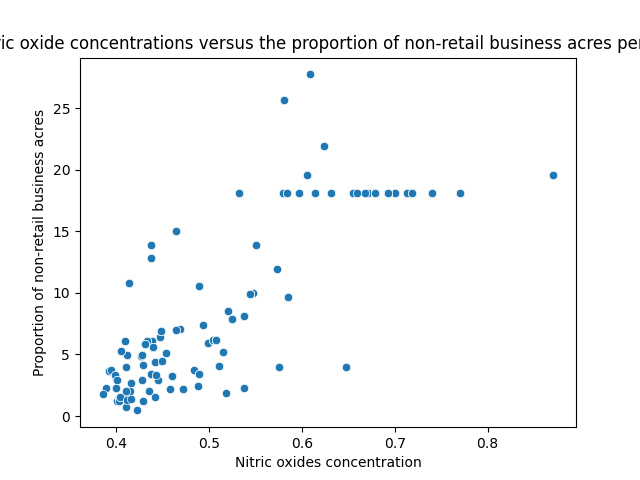

In [10]:
# Median value of owner-occupied homes
ax=sns.scatterplot(data = boston_df, x = "NOX", y = "INDUS")
pyplot.title(" Nitric oxide concentrations versus the proportion of non-retail business acres per town")
pyplot.xlabel("Nitric oxides concentration")
pyplot.ylabel("Proportion of non-retail business acres")
pyplot.show()
# There is a positive correlation with a vaguely linear relationship for values of NOX to about 0.6.
# There is also a set of datapoints spanning higher NOX values all with the same value of non-retail acres, of approx 18

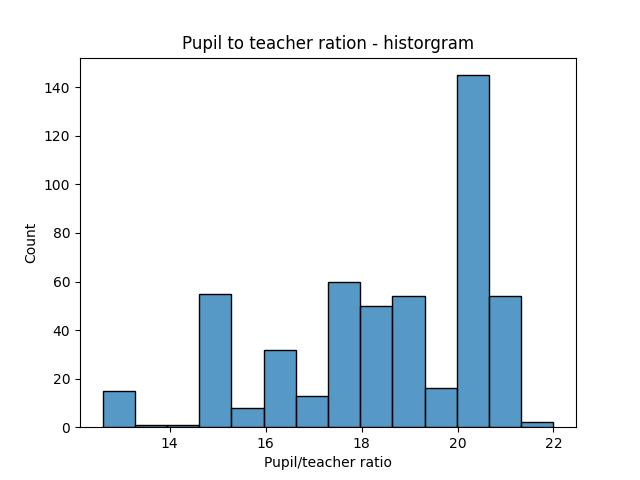

In [11]:
#Create a histogram for the pupil to teacher ratio variable
ax=sns.histplot(data = boston_df, x = "PTRATIO")
pyplot.title("Pupil to teacher ration - historgram")
pyplot.xlabel("Pupil/teacher ratio")
pyplot.show()


In [12]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#  1. State your hypothesis.
#  2. Use α = 0.05
#  3. Perform the test Statistics.
#  4. State the conclusion from the test.

# Hypothesis:
#  H_0 - there is no difference in median between houses bounded by the Charles river (CHAS==1.0) and not bounded
#  H_1 - there is difference in median (median of houses CHAS==1.0 <> median of houses CHAS == 0.0)
#

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1.0]['MEDV'], boston_df[boston_df['CHAS'] == 0.0]['MEDV'],equal_var=True,random_state=37)

# CONCLUSION: as pvalue is 7.39 * 10^{-5}, it is SMALLER than alpha value of 0.05. Thus the null hypothesis can be rejected - there is enough proof that there is a statistical difference in median 
# values of houses bounded and not-bounded by Charles River

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [13]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#  1. State your hypothesis.
#  2. Use α = 0.05
#  3. Perform the test Statistics.
#  4. State the conclusion from the test.

# Hypothesis:
#  H_0 - there is no difference between median values of houses built prior to 1940 between different age groups of houses (0-35,35-70,70+) 
# alternative hypothesis - there is difference between median values of houses between at least 2 of the 3 age groups
#
# 1. age groups have already been established in an earlier excerise, part of AGE_GROUP column
print(boston_df[["MEDV","AGE_GROUP"]].head())
# 2. Test for equality of variance
levRes = scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '0-35']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == '35-70']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70+']['MEDV'], 
                   center='mean')
print("Levene Result p-value:",levRes.pvalue)
# 2... pvalue of approx 0.83, we can assume that variances are equal for the purpose of below ANOVA test

f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['AGE_GROUP'] == '0-35']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == '35-70']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70+']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# CONCLUSION p_value from the ANOVA test is roughly 10^{-12} which is smaller than alpha value of 0.05. Hence the null hypothesis can be rejected, and we conclude that there are statistically significant differences 
# in median values between pre-1940 houses of various ages


     MEDV AGE_GROUP
252  29.6      0-35
254  21.9      0-35
255  20.9      0-35
256  44.0      0-35
335  21.1      0-35
Levene Result p-value: 0.08259117874287342
F_Statistic: 29.02858320897758, P-Value: 1.1723548056383608e-12


In [14]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#  1. State your hypothesis.
#  2. Use α = 0.05
#  3. Perform the test Statistics.
#  4. State the conclusion from the test.
#
# 1. HYPOTHESIS:
#  H_0: Nitric oxide concentration is not correlated with proportion of non-retial business acres per town
#  H_1: Nitric oxide concentration is correlated with proportion of non-retial business acres per town
# 
(corr_coef,pvalue)=scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Correlation coefficient:{0}, pvalue:{1}".format(corr_coef,pvalue))
#
# CONCLUSION: Pearsons test is showing positive correlation between variables, and more importantly pvalue in the test is MUCH lower that alpha value of 0.05 - meaning we can reject the null hypothenis.
# Thus we have to conclude that there DOES EXIST relationship between Nitric oxide concentrations and proportoin on non-retail business acres


Correlation coefficient:0.7636514469209144, pvalue:7.91336106124409e-98


In [15]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
X = boston_df['DIS']
y = boston_df['MEDV']
# add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

#  4. Conclusion:
# Coefficient of 1.0916 means that for every 1 unit of weighted distance, there is statistically 1.0916 increase in median values of owner occupied homes

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           1.21e-08
Time:                        13:09:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""